In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff

In [2]:
# load titanic dataset into csv
titanic_df = pd.read_csv('./titanic.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Sum the survivors using boolean indexing

titanic_df.loc[titanic_df['Survived'] == 1, 'Survived'].sum()

342

<Axes: title={'center': 'Titanic Fare Per Age'}, xlabel='Age', ylabel='Fare'>

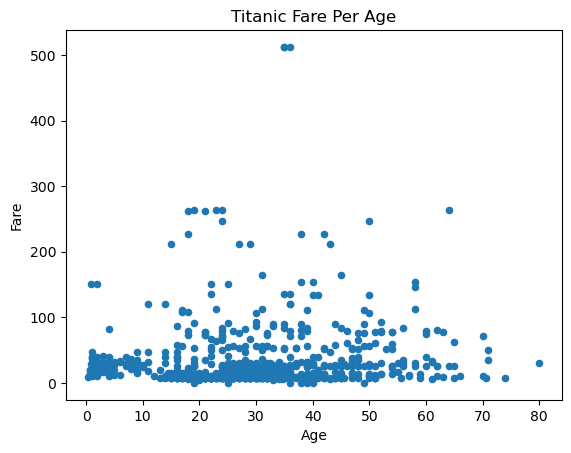

In [5]:
# Plot age against fare
titanic_df.plot(kind="scatter", x="Age", y="Fare", title="Titanic Fare Per Age")

<Axes: xlabel='Sex', ylabel='Age'>

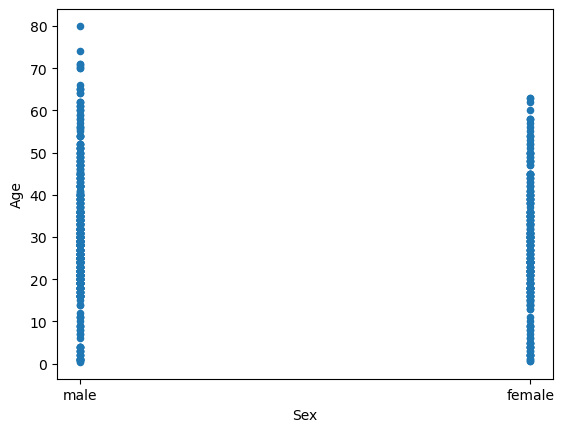

In [6]:
# Plot Gender vs Age
titanic_df.plot(kind="scatter", x="Sex", y="Age")

<Axes: xlabel='Sex', ylabel='Survived'>

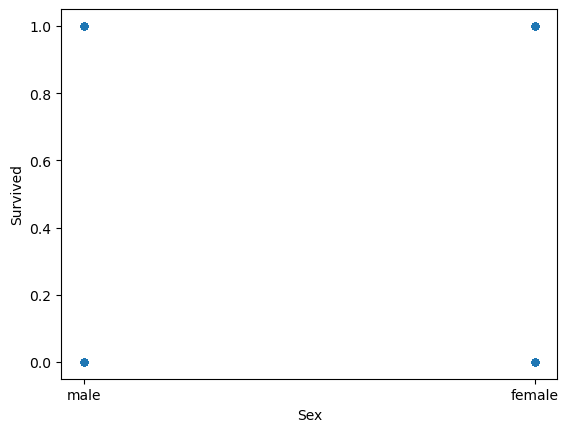

In [7]:
# Plot Sex against survival
titanic_df.plot(kind="scatter", x="Sex", y="Survived")

In [8]:
# Count Male Passengers
male_passengers = titanic_df.loc[titanic_df["Sex"] == "male", "Sex"].count()
male_passengers

577

In [9]:
# Count Female Passengers
female_passengers = titanic_df.loc[titanic_df['Sex'] == 'female', "Sex"].count()
female_passengers

314

In [10]:
# Count Male Survivors
male_survivors = titanic_df.loc[titanic_df['Sex'] == 'male', 'Survived'].sum()
male_survivors

109

In [11]:
female_survivors = titanic_df.loc[titanic_df['Sex'] == 'female', 'Survived'].sum()
female_survivors

233

In [12]:
male_survivor_rate = male_survivors / male_passengers * 100
female_survivor_rate = female_survivors / female_passengers * 100

print(f'The male survival rate was {round(male_survivor_rate, 1)}%')
print(f'The female survival rate was {round(female_survivor_rate, 1)}%')

The male survival rate was 18.9%
The female survival rate was 74.2%


In [13]:
# Calculate Average Ages of Males and Females
male_average_age = titanic_df.loc[titanic_df['Sex'] == 'male', 'Age'].mean()
female_average_age = titanic_df.loc[titanic_df['Sex'] == 'female', 'Age'].mean()

print(f'The average male age was: {round(male_average_age, 1)} years')
print(f'The average female age was: {round(female_average_age, 1)} years')

The average male age was: 30.7 years
The average female age was: 27.9 years


In [14]:
# Box Plot of Ages by Sex
px.box(titanic_df, x="Sex", y="Age")

<Axes: xlabel='Age', ylabel='Survived'>

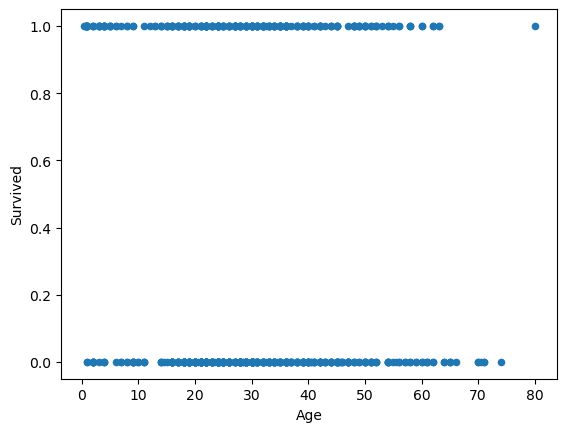

In [15]:
# Get Survivors by Age
titanic_df.plot(kind="scatter", x="Age", y="Survived")

In [16]:
# Age Distribution by Gender
px.histogram(titanic_df, x="Age", color="Sex")

# Support Vector Machine Classifier

In [17]:
# Normalize Sex Feature
sex_normalized = []
for i in titanic_df['Sex']:
  if i == 'male':
    sex_normalized.append(1)
  else:
    sex_normalized.append(0)

titanic_df['Norm Sex'] = sex_normalized

In [18]:
# construct dataframe of numerical values and drop rows with NaN
cleansed_df = titanic_df.drop(columns=['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']).dropna(axis=1)
cleansed_df

,Survived,Pclass,SibSp,Parch,Fare,Norm Sex
0,0,3,1,0,7.2500,1
1,1,1,1,0,71.2833,0
2,1,3,0,0,7.9250,0
3,1,1,1,0,53.1000,0
4,0,3,0,0,8.0500,1
...,...,...,...,...,...,...
886,0,2,0,0,13.0000,1
887,1,1,0,0,30.0000,0
888,0,3,1,2,23.4500,0
889,1,1,0,0,30.0000,1


In [19]:
# define X and y
X = np.asarray(cleansed_df.drop(columns='Survived'))
y = np.asarray(cleansed_df['Survived'])

X.shape, y.shape

((891, 5), (891,))

In [20]:
from sklearn.model_selection import train_test_split
# split data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y_train.shape, y_test.shape

((623,), (268,))

In [21]:
# train the classifer
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)


SVC()

In [22]:
# predict y_test values
y_pred = clf.predict(X_test)

In [23]:
# Calculate the accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy * 100, 1)}%")

Accuracy: 66.0%


## Classification with Keras

In [24]:
from tensorflow import keras
from tensorflow.keras import layers

# define the model
model = keras.Sequential([
    layers.Dense(64, activation='relu'), # Hidden layer
    layers.Dense(32, activation='relu'), # Another hidden layer
    layers.Dense(16, activation='relu'), # Another hidden layer
    layers.Dense(1, activation='sigmoid') # Output layer for binary classification
])

# compile the model
model.compile(
  optimizer="adam",
  loss="binary_crossentropy",
  metrics=['binary_accuracy']
)

# train the model
model.fit(X_train, y_train, epochs=25, batch_size=32)


Epoch 1/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.4265 - loss: 0.7931   
Epoch 2/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.6511 - loss: 0.6335 
Epoch 3/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.6828 - loss: 0.6116 
Epoch 4/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.6812 - loss: 0.6049 
Epoch 5/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.6868 - loss: 0.5918 
Epoch 6/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.6792 - loss: 0.5921 
Epoch 7/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.6748 - loss: 0.5758 
Epoch 8/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.6863 - loss: 0.5727 
Epoch 9/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.6872 - loss: 0.5723 
Epoch 10/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.7014 - loss: 0.5610 
Epoch 11/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.7149 

In [25]:
# get probabilities for X_test and convert to binary values
y_prob = model.predict(X_test)
y_pred = (y_prob > 0.5).astype(int)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [26]:
# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy * 100, 1)}%")

Accuracy: 78.7%
